In [1]:
import numpy as np
import matplotlib.pyplot as plt
 
%matplotlib inline

import os
#os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img

2025-01-29 12:11:59.112142: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738163519.133784 1412344 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738163519.140843 1412344 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-29 12:11:59.164379: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
tf.__version__

'2.18.0'

In [3]:
# Verify GPU Usage
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


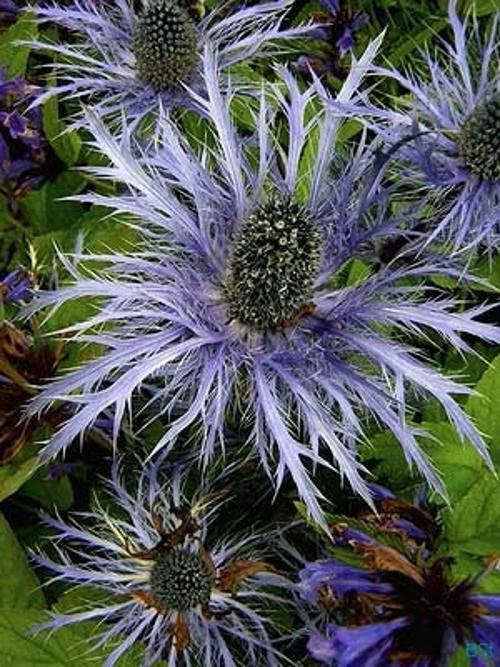

In [4]:
path = '../flowers-dataset/split_dataset_by_class/train/alpine sea holly'
name = 'image_06969.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

In [5]:
img = load_img(fullname, target_size=(299, 299))

In [6]:
print(img)

<PIL.Image.Image image mode=RGB size=299x299 at 0x7F91642BF4F0>


In [7]:
x = np.array(img)
x

array([[[ 64,  43,  86],
        [ 64,  45,  91],
        [ 53,  34,  89],
        ...,
        [ 64,  96,  33],
        [ 69, 102,  33],
        [ 59,  92,  23]],

       [[ 69,  51,  91],
        [ 77,  60, 104],
        [ 73,  56, 108],
        ...,
        [ 74, 104,  44],
        [ 67,  98,  30],
        [ 72, 103,  35]],

       [[ 50,  36,  71],
        [ 62,  50,  90],
        [ 70,  58, 104],
        ...,
        [103, 132,  74],
        [ 66,  97,  30],
        [ 70, 101,  34]],

       ...,

       [[ 72, 101,  19],
        [ 77, 106,  24],
        [ 80, 109,  27],
        ...,
        [ 42,  40,  89],
        [ 46,  48,  99],
        [ 34,  36,  87]],

       [[ 85, 114,  32],
        [ 82, 111,  29],
        [ 77, 106,  24],
        ...,
        [ 42,  44,  82],
        [ 40,  43,  96],
        [ 33,  36,  89]],

       [[ 84, 113,  31],
        [ 73, 102,  20],
        [ 75, 104,  22],
        ...,
        [ 44,  48,  77],
        [ 35,  41,  93],
        [ 32,  38,  90]]

In [8]:
x.shape

(299, 299, 3)

In [9]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions
 
# weights = "imagenet" means we want to use pre-trained network that was trained on imagenet
 
model = Xception(
    weights="imagenet",
    input_shape=(299, 299, 3)
)

I0000 00:00:1738163583.519811 1412344 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3487 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1


In [10]:
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [11]:
X = preprocess_input(X)
X[0]

array([[[-0.4980392 , -0.6627451 , -0.32549018],
        [-0.4980392 , -0.64705884, -0.2862745 ],
        [-0.58431375, -0.73333335, -0.30196077],
        ...,
        [-0.4980392 , -0.24705881, -0.7411765 ],
        [-0.4588235 , -0.19999999, -0.7411765 ],
        [-0.5372549 , -0.27843136, -0.81960785]],

       [[-0.4588235 , -0.6       , -0.2862745 ],
        [-0.3960784 , -0.5294118 , -0.18431371],
        [-0.42745095, -0.56078434, -0.15294117],
        ...,
        [-0.41960782, -0.18431371, -0.654902  ],
        [-0.47450978, -0.23137254, -0.7647059 ],
        [-0.4352941 , -0.19215685, -0.7254902 ]],

       [[-0.60784316, -0.7176471 , -0.44313723],
        [-0.5137255 , -0.60784316, -0.29411763],
        [-0.45098037, -0.54509807, -0.18431371],
        ...,
        [-0.19215685,  0.03529418, -0.41960782],
        [-0.4823529 , -0.23921567, -0.7647059 ],
        [-0.45098037, -0.20784312, -0.73333335]],

       ...,

       [[-0.4352941 , -0.20784312, -0.8509804 ],
        [-0

In [12]:
pred = model.predict(X)

I0000 00:00:1738163598.571782 1419489 service.cc:148] XLA service 0x7f8fa40040e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1738163598.571810 1419489 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce GTX 1050, Compute Capability 6.1
2025-01-29 12:13:18.613761: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1738163599.022557 1419489 cuda_dnn.cc:529] Loaded cuDNN version 90300


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


I0000 00:00:1738163602.875198 1419489 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [13]:
pred.shape

(1, 1000)

In [14]:
pred

array([[4.05271130e-05, 1.66380749e-04, 1.31688081e-04, 1.53417830e-04,
        8.31005746e-05, 6.99047960e-05, 3.02771386e-05, 1.27171588e-04,
        7.59672548e-05, 7.88133038e-05, 5.74660487e-04, 2.44893320e-03,
        1.21027906e-03, 8.12520040e-04, 3.72473238e-04, 1.05689476e-04,
        2.01852396e-04, 1.93293250e-04, 1.33470181e-04, 4.22385172e-04,
        1.11140536e-04, 2.78303633e-04, 1.85466051e-04, 6.31275325e-05,
        2.34680469e-04, 1.16997522e-04, 2.21038223e-04, 2.52042431e-04,
        1.20609708e-04, 8.54123573e-05, 7.61230258e-05, 3.96717514e-05,
        2.16247674e-04, 6.72169772e-05, 1.43525103e-04, 7.92078354e-05,
        1.00640449e-04, 1.73202614e-04, 1.24315513e-04, 3.24470224e-04,
        9.09249720e-05, 3.83606239e-04, 6.00307721e-05, 1.14959774e-04,
        1.42699253e-04, 1.09310204e-03, 1.25633189e-04, 2.83642497e-04,
        1.33944151e-04, 5.63255380e-05, 3.45871413e-05, 1.05128856e-04,
        1.70077372e-04, 2.35075044e-04, 2.45290430e-04, 1.130381

In [15]:
decode_predictions(pred)

[[('n07730033', 'cardoon', np.float32(0.5603339)),
  ('n11939491', 'daisy', np.float32(0.1626728)),
  ('n07753275', 'pineapple', np.float32(0.031539302)),
  ('n03991062', 'pot', np.float32(0.021178305)),
  ('n02206856', 'bee', np.float32(0.013285332))]]

In [16]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Reading data with ImageDataGenerator

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
 
train_ds = train_gen.flow_from_directory(
    '../flowers-dataset/split_dataset_by_class/train',
    target_size=(150, 150),
    batch_size=32
)

Found 6551 images belonging to 102 classes.


In [18]:
train_ds.class_indices

{'alpine sea holly': 0,
 'anthurium': 1,
 'artichoke': 2,
 'azalea': 3,
 'balloon flower': 4,
 'barbeton daisy': 5,
 'bearded iris': 6,
 'bee balm': 7,
 'bird of paradise': 8,
 'bishop of llandaff': 9,
 'black-eyed susan': 10,
 'blackberry lily': 11,
 'blanket flower': 12,
 'bolero deep blue': 13,
 'bougainvillea': 14,
 'bromelia': 15,
 'buttercup': 16,
 'californian poppy': 17,
 'camellia': 18,
 'canna lily': 19,
 'canterbury bells': 20,
 'cape flower': 21,
 'carnation': 22,
 'cautleya spicata': 23,
 'clematis': 24,
 "colt's foot": 25,
 'columbine': 26,
 'common dandelion': 27,
 'corn poppy': 28,
 'cyclamen': 29,
 'daffodil': 30,
 'desert-rose': 31,
 'fire lily': 32,
 'foxglove': 33,
 'frangipani': 34,
 'fritillary': 35,
 'garden phlox': 36,
 'gaura': 37,
 'gazania': 38,
 'geranium': 39,
 'giant white arum lily': 40,
 'globe flower': 41,
 'globe thistle': 42,
 'grape hyacinth': 43,
 'great masterwort': 44,
 'hard-leaved pocket orchid': 45,
 'hibiscus': 46,
 'hippeastrum': 47,
 'japane

In [20]:
next(train_ds)

(array([[[[-0.24705881, -0.3490196 , -0.41960782],
          [-0.32549018, -0.47450978, -0.5294118 ],
          [-0.31764704, -0.45098037, -0.5137255 ],
          ...,
          [ 0.082353  , -0.08235294, -0.21568626],
          [-0.56078434, -0.58431375, -0.6392157 ],
          [-0.56078434, -0.5921569 , -0.6627451 ]],
 
         [[-0.31764704, -0.41960782, -0.4823529 ],
          [-0.09019607, -0.2235294 , -0.27843136],
          [-0.15294117, -0.27058822, -0.32549018],
          ...,
          [-0.52156866, -0.6       , -0.67058825],
          [-0.4980392 , -0.58431375, -0.6313726 ],
          [-0.5529412 , -0.62352943, -0.6627451 ]],
 
         [[-0.20784312, -0.29411763, -0.34117645],
          [-0.34117645, -0.4588235 , -0.4980392 ],
          [-0.4352941 , -0.5372549 , -0.58431375],
          ...,
          [-0.47450978, -0.5137255 , -0.54509807],
          [-0.372549  , -0.47450978, -0.52156866],
          [-0.6313726 , -0.70980394, -0.7254902 ]],
 
         ...,
 
         [[-

In [19]:
X, y = next(train_ds)

In [20]:
X

array([[[[ 0.00392163, -0.16862744, -0.6392157 ],
         [-0.08235294, -0.1372549 , -0.7647059 ],
         [-0.17647058, -0.15294117, -0.8352941 ],
         ...,
         [-0.6313726 , -0.77254903, -0.88235295],
         [-0.5921569 , -0.7411765 , -0.8745098 ],
         [-0.58431375, -0.6862745 , -0.81960785]],

        [[ 0.01176476, -0.17647058, -0.6784314 ],
         [-0.05098039, -0.12156862, -0.7254902 ],
         [-0.12941176, -0.1372549 , -0.7882353 ],
         ...,
         [-0.6313726 , -0.77254903, -0.8666667 ],
         [-0.5921569 , -0.7411765 , -0.85882354],
         [-0.5529412 , -0.69411767, -0.8509804 ]],

        [[ 0.02745104, -0.16862744, -0.6862745 ],
         [-0.04313725, -0.1372549 , -0.7176471 ],
         [-0.09803921, -0.12156862, -0.7411765 ],
         ...,
         [-0.6392157 , -0.78039217, -0.85882354],
         [-0.6156863 , -0.7647059 , -0.8745098 ],
         [-0.54509807, -0.70980394, -0.84313726]],

        ...,

        [[ 0.23921573, -0.06666666, -0

In [21]:
y[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.

In [22]:
X.shape

(32, 150, 150, 3)

In [23]:
# The same for validation dataset
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
 
val_ds = val_gen.flow_from_directory(
    '../flowers-dataset/split_dataset_by_class/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 819 images belonging to 102 classes.


# Train Xception on smaller images (150×150)

In [24]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)
 
base_model.trainable = False
inputs = keras.Input(shape=(150, 150, 3))
base = base_model(inputs, training=False)
vectors = keras.layers.GlobalAveragePooling2D()(base)
outputs = keras.layers.Dense(102)(vectors)
model = keras.Model(inputs, outputs)
 
preds = model.predict(X)
preds.shape

2025-01-29 12:14:23.924722: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocate 4.50GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


(32, 102)

In [25]:
preds[0]

array([-0.9074811 ,  0.43606862,  0.96371466, -0.09105012, -0.8232285 ,
       -0.15226427, -0.36779416,  0.1013142 ,  0.26655746,  0.4729668 ,
       -0.36215687,  0.21295974,  0.08428073,  1.04748   , -0.1724338 ,
       -0.52660346,  0.19541642,  0.12580615,  0.12657997, -1.2445803 ,
       -0.15893957, -0.9035899 ,  0.705701  , -0.02675542,  0.11710414,
       -0.53605115,  0.26204485, -0.76761603,  0.8373093 ,  0.4414748 ,
        1.3583338 ,  1.0190424 , -0.67609036,  0.29657003,  1.0179222 ,
        1.1039896 , -0.04135627,  0.5033524 ,  0.84715986,  0.7413766 ,
        0.81267416,  0.3049624 , -0.08651136,  1.0944947 ,  1.1119438 ,
       -0.6813045 , -0.64703107,  0.10172585,  0.747334  , -0.15962338,
       -0.04246214,  0.5095448 ,  0.99672127, -0.31117707, -0.7225832 ,
       -0.11860146, -0.36504528,  0.682407  ,  2.3728333 ,  0.34886646,
       -0.10655335, -0.8709344 , -0.90079963, -0.9389733 , -1.0897391 ,
       -0.71285313, -0.03425477,  0.7651569 ,  0.5651593 , -1.02

In [26]:
type(preds[0])

numpy.ndarray

# Optimize and Compile the model

In [27]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
 
loss = keras.losses.CategoricalCrossentropy(from_logits=True)
 
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])


In [28]:
# 3625 seg = 60,42 min
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

/home/jdanussi/.local/share/virtualenvs/capstone2-Acj_LonX/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
 28/205 ━━━━━━━━━━━━━━━━━━━━ 23s 132ms/step - accuracy: 0.1928 - loss: 6.2914

2025-01-29 12:15:26.707621: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocate 4.45GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step - accuracy: 0.4263 - loss: 3.6947  

2025-01-29 12:16:49.432430: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocate 4.43GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


205/205 ━━━━━━━━━━━━━━━━━━━━ 101s 463ms/step - accuracy: 0.4269 - loss: 3.6893 - val_accuracy: 0.6300 - val_loss: 2.0538
Epoch 2/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 84s 409ms/step - accuracy: 0.8026 - loss: 0.8797 - val_accuracy: 0.7057 - val_loss: 1.7961
Epoch 3/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 97s 471ms/step - accuracy: 0.8768 - loss: 0.4575 - val_accuracy: 0.7253 - val_loss: 1.7424
Epoch 4/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 101s 493ms/step - accuracy: 0.9122 - loss: 0.3343 - val_accuracy: 0.7241 - val_loss: 2.1631
Epoch 5/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 127s 421ms/step - accuracy: 0.9392 - loss: 0.2667 - val_accuracy: 0.7314 - val_loss: 1.8491
Epoch 6/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 86s 418ms/step - accuracy: 0.9475 - loss: 0.1971 - val_accuracy: 0.7534 - val_loss: 1.9847
Epoch 7/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 87s 422ms/step - accuracy: 0.9534 - loss: 0.1836 - val_accuracy: 0.7167 - val_loss: 2.4804
Epoch 8/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 91s 438ms/step - accuracy: 0.9571 - loss: 0.1698 - 

In [29]:
history.history['accuracy']

[0.5451076030731201,
 0.8111738562583923,
 0.865516722202301,
 0.9049000144004822,
 0.9285604953765869,
 0.9494733810424805,
 0.9500839710235596,
 0.9616852402687073,
 0.9685544371604919,
 0.9519157409667969]

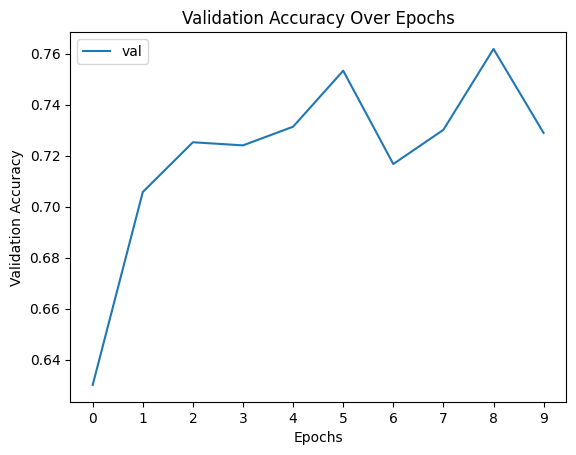

In [30]:
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))

# Add labels and title
plt.xlabel("Epochs")  # X-axis label
plt.ylabel("Validation Accuracy")  # Y-axis label
plt.title("Validation Accuracy Over Epochs")  # Graph title

# Add legend
plt.legend()

# Show the plot
plt.show()


# Tunning the Learning rate

In [31]:
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )
 
    base_model.trainable = False
 
    #########################################
 
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(102)(vectors)
    model = keras.Model(inputs, outputs)
     
    #########################################
 
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
 
    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
     
    return model

In [32]:
scores = {}
 
for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)
 
    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history
 
    print()
    print()

0.0001
Epoch 1/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 109s 500ms/step - accuracy: 0.0711 - loss: 4.3450 - val_accuracy: 0.2991 - val_loss: 3.2850
Epoch 2/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 89s 432ms/step - accuracy: 0.3744 - loss: 2.9991 - val_accuracy: 0.4603 - val_loss: 2.5674
Epoch 3/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 89s 432ms/step - accuracy: 0.5443 - loss: 2.2788 - val_accuracy: 0.5543 - val_loss: 2.1459
Epoch 4/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 140s 421ms/step - accuracy: 0.6410 - loss: 1.8937 - val_accuracy: 0.6093 - val_loss: 1.8751
Epoch 5/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 85s 416ms/step - accuracy: 0.6904 - loss: 1.6205 - val_accuracy: 0.6435 - val_loss: 1.6943
Epoch 6/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 93s 455ms/step - accuracy: 0.7374 - loss: 1.4157 - val_accuracy: 0.6752 - val_loss: 1.5459
Epoch 7/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 108s 524ms/step - accuracy: 0.7726 - loss: 1.2542 - val_accuracy: 0.7021 - val_loss: 1.4499
Epoch 8/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 98s 479ms/step - accuracy: 0.7957

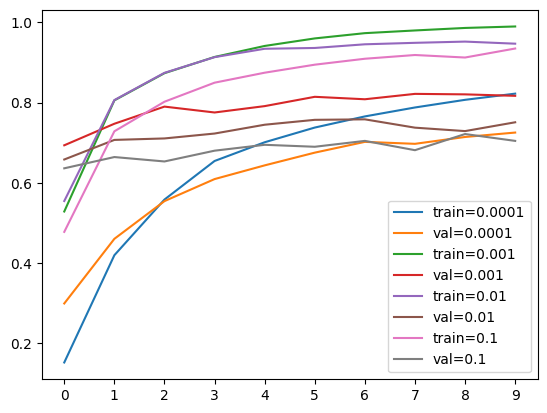

In [33]:
for lr, hist in scores.items():
    plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))
 
plt.xticks(np.arange(10))
plt.legend()

In [34]:
# Best performance
learning_rate = 0.001

# Saving the best model only

In [35]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [36]:
learning_rate = 0.001
 
model = make_model(learning_rate=learning_rate)
 
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[checkpoint]
)

Epoch 1/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 0.3531 - loss: 3.0199 

205/205 ━━━━━━━━━━━━━━━━━━━━ 51s 218ms/step - accuracy: 0.3540 - loss: 3.0155 - val_accuracy: 0.7057 - val_loss: 1.2545
Epoch 2/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step - accuracy: 0.7979 - loss: 0.9111  

205/205 ━━━━━━━━━━━━━━━━━━━━ 82s 401ms/step - accuracy: 0.7979 - loss: 0.9108 - val_accuracy: 0.7509 - val_loss: 1.0327
Epoch 3/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step - accuracy: 0.8735 - loss: 0.5778  

205/205 ━━━━━━━━━━━━━━━━━━━━ 89s 434ms/step - accuracy: 0.8735 - loss: 0.5778 - val_accuracy: 0.7729 - val_loss: 0.9049
Epoch 4/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step - accuracy: 0.9046 - loss: 0.4288  

205/205 ━━━━━━━━━━━━━━━━━━━━ 91s 442ms/step - accuracy: 0.9046 - loss: 0.4288 - val_accuracy: 0.7900 - val_loss: 0.8320
Epoch 5/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step - accuracy: 0.9494 - loss: 0.3065  

205/205 ━━━━━━━━━━━━━━━━━━━━ 90s 439ms/step - accuracy: 0.9493 - loss: 0.3066 - val_accuracy: 0.7985 - val_loss: 0.7816
Epoch 6/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step - accuracy: 0.9585 - loss: 0.2600  

205/205 ━━━━━━━━━━━━━━━━━━━━ 91s 445ms/step - accuracy: 0.9586 - loss: 0.2600 - val_accuracy: 0.8034 - val_loss: 0.7760
Epoch 7/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step - accuracy: 0.9755 - loss: 0.1997  

205/205 ━━━━━━━━━━━━━━━━━━━━ 94s 458ms/step - accuracy: 0.9755 - loss: 0.1997 - val_accuracy: 0.8120 - val_loss: 0.7651
Epoch 8/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step - accuracy: 0.9804 - loss: 0.1647  

205/205 ━━━━━━━━━━━━━━━━━━━━ 89s 435ms/step - accuracy: 0.9804 - loss: 0.1648 - val_accuracy: 0.8217 - val_loss: 0.7426
Epoch 9/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 91s 445ms/step - accuracy: 0.9868 - loss: 0.1418 - val_accuracy: 0.8120 - val_loss: 0.7436
Epoch 10/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step - accuracy: 0.9912 - loss: 0.1091  

205/205 ━━━━━━━━━━━━━━━━━━━━ 90s 437ms/step - accuracy: 0.9912 - loss: 0.1091 - val_accuracy: 0.8242 - val_loss: 0.7360


# Experimenting with different sizes of inner layer

In [39]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )
 
    base_model.trainable = False
 
    #########################################
 
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
     
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
     
    outputs = keras.layers.Dense(102)(inner)
     
    model = keras.Model(inputs, outputs)
     
    #########################################
 
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
 
    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
     
    return model

In [40]:
learning_rate = 0.001
 
scores = {}
 
for size in [10, 100, 1000]:
    print(size)
 
    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history
 
    print()
    print()

10
Epoch 1/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 44s 184ms/step - accuracy: 0.0394 - loss: 4.4652 - val_accuracy: 0.1355 - val_loss: 3.8187
Epoch 2/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 61s 299ms/step - accuracy: 0.1663 - loss: 3.6343 - val_accuracy: 0.2442 - val_loss: 3.1865
Epoch 3/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 81s 394ms/step - accuracy: 0.2662 - loss: 3.0469 - val_accuracy: 0.2991 - val_loss: 2.8468
Epoch 4/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 84s 409ms/step - accuracy: 0.3147 - loss: 2.7056 - val_accuracy: 0.3346 - val_loss: 2.6591
Epoch 5/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 86s 420ms/step - accuracy: 0.3704 - loss: 2.4320 - val_accuracy: 0.3663 - val_loss: 2.5285
Epoch 6/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 86s 417ms/step - accuracy: 0.3983 - loss: 2.2868 - val_accuracy: 0.3834 - val_loss: 2.4490
Epoch 7/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 95s 463ms/step - accuracy: 0.4205 - loss: 2.1731 - val_accuracy: 0.3919 - val_loss: 2.3671
Epoch 8/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 86s 421ms/step - accuracy: 0.4402 - loss

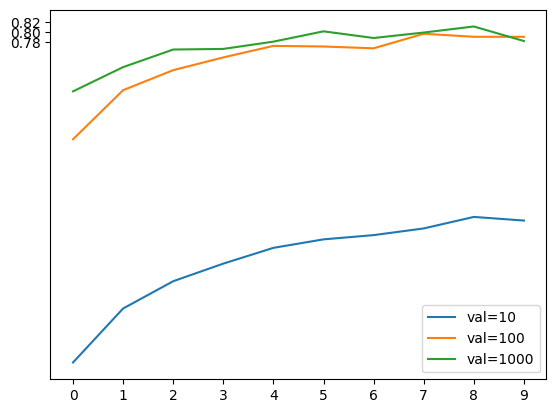

In [42]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))
 
plt.xticks(np.arange(10))
plt.yticks([0.78, 0.80, 0.82])
plt.legend()

# Regularization and Dropout

In [43]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )
 
    base_model.trainable = False
 
    #########################################
 
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
     
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
     
    outputs = keras.layers.Dense(102)(drop)
     
    model = keras.Model(inputs, outputs)
     
    #########################################
 
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
 
    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
     
    return model

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [46]:
# The downside of dropout is that you’ll need more iterations to learn something. Therefor we change the value from 10 to 30.
learning_rate = 0.001
size = 100
 
scores = {}
 
for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)
 
    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )
 
    history = model.fit(train_ds, epochs=5, validation_data=val_ds)
    scores[droprate] = history.history
 
    print()
    print()

0.0
Epoch 1/5
205/205 ━━━━━━━━━━━━━━━━━━━━ 107s 489ms/step - accuracy: 0.2464 - loss: 3.5026 - val_accuracy: 0.5885 - val_loss: 1.6456
Epoch 2/5
205/205 ━━━━━━━━━━━━━━━━━━━━ 93s 455ms/step - accuracy: 0.6915 - loss: 1.2642 - val_accuracy: 0.6691 - val_loss: 1.2553
Epoch 3/5
205/205 ━━━━━━━━━━━━━━━━━━━━ 98s 478ms/step - accuracy: 0.8066 - loss: 0.8067 - val_accuracy: 0.7277 - val_loss: 1.0411
Epoch 4/5
205/205 ━━━━━━━━━━━━━━━━━━━━ 99s 483ms/step - accuracy: 0.8519 - loss: 0.5985 - val_accuracy: 0.7497 - val_loss: 0.9648
Epoch 5/5
205/205 ━━━━━━━━━━━━━━━━━━━━ 96s 468ms/step - accuracy: 0.8934 - loss: 0.4375 - val_accuracy: 0.7607 - val_loss: 0.9226


0.2
Epoch 1/5
205/205 ━━━━━━━━━━━━━━━━━━━━ 119s 508ms/step - accuracy: 0.1999 - loss: 3.7009 - val_accuracy: 0.5751 - val_loss: 1.7575
Epoch 2/5
205/205 ━━━━━━━━━━━━━━━━━━━━ 90s 441ms/step - accuracy: 0.5888 - loss: 1.5961 - val_accuracy: 0.6703 - val_loss: 1.2664
Epoch 3/5
205/205 ━━━━━━━━━━━━━━━━━━━━ 92s 449ms/step - accuracy: 0.6999 - los

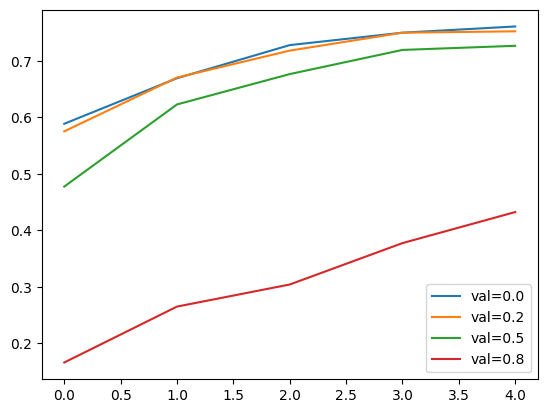

In [48]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))
 
#plt.ylim(0.78, 0.86)
plt.legend()

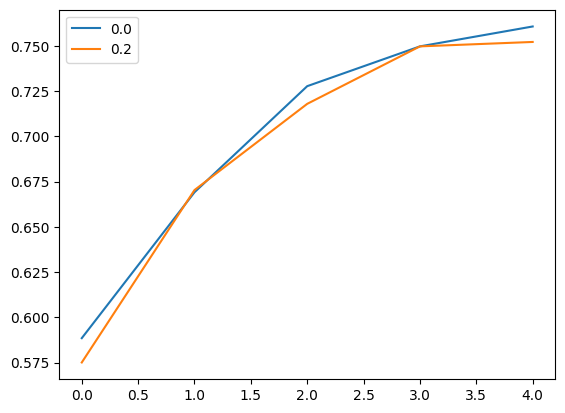

In [49]:
hist = scores[0.0]
plt.plot(hist['val_accuracy'], label=0.0)
 
hist = scores[0.2]
plt.plot(hist['val_accuracy'], label=0.2)
 
plt.legend()

# Training a model with augmentations

In [51]:
# rotation_range=30,
# width_shift_range=10,
# height_shift_range=10,
# shear_range=10,
# zoom_range=0.3,
# cval=0.0,
# horizontal_flip=True,
# vertical_flip=True,


train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=30,
    width_shift_range=10,
    height_shift_range=10,
    zoom_range=0.3,
    horizontal_flip=True,
)
 
train_ds = train_gen.flow_from_directory(
    '../flowers-dataset/split_dataset_by_class/train',
    target_size=(150, 150),
    batch_size=32
)
 
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
 
val_ds = val_gen.flow_from_directory(
    '../flowers-dataset/split_dataset_by_class/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 6551 images belonging to 102 classes.
Found 819 images belonging to 102 classes.


In [52]:
learning_rate = 0.001
size = 100
droprate = 0.2
 
model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)
 
history = model.fit(train_ds, epochs=50, validation_data=val_ds)
 

Epoch 1/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step - accuracy: 0.1476 - loss: 3.9300 

/home/jdanussi/.local/share/virtualenvs/capstone2-Acj_LonX/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


205/205 ━━━━━━━━━━━━━━━━━━━━ 100s 453ms/step - accuracy: 0.1481 - loss: 3.9270 - val_accuracy: 0.4896 - val_loss: 2.0939
Epoch 2/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 105s 510ms/step - accuracy: 0.4450 - loss: 2.2129 - val_accuracy: 0.6117 - val_loss: 1.5139
Epoch 3/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 130s 632ms/step - accuracy: 0.5622 - loss: 1.6747 - val_accuracy: 0.6935 - val_loss: 1.2505
Epoch 4/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 140s 683ms/step - accuracy: 0.6162 - loss: 1.4344 - val_accuracy: 0.7045 - val_loss: 1.1217
Epoch 5/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 148s 722ms/step - accuracy: 0.6427 - loss: 1.2975 - val_accuracy: 0.7241 - val_loss: 1.0698
Epoch 6/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 171s 833ms/step - accuracy: 0.6755 - loss: 1.1678 - val_accuracy: 0.7314 - val_loss: 0.9833
Epoch 7/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 163s 793ms/step - accuracy: 0.6948 - loss: 1.1084 - val_accuracy: 0.7582 - val_loss: 0.9295
Epoch 8/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 179s 866ms/step - accuracy: 0.7128 - loss: 1.03

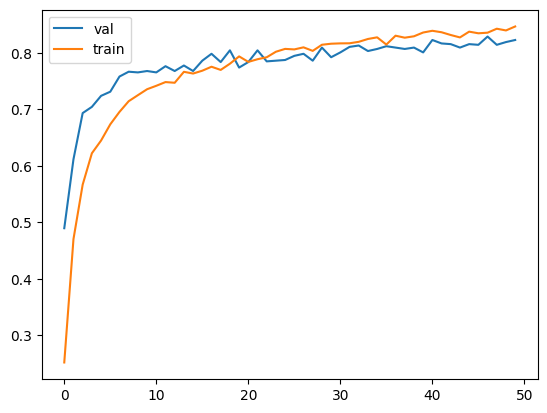

In [53]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')
 
plt.legend()